In [1]:
!pip install matplotlib seaborn


     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------- ------------------------------- 30.7/165.5 kB 1.3 MB/s eta 0:00:01
     ------- ------------------------------- 30.7/165.5 kB 1.3 MB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 326.8 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.5 kB 456.6 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/165.5 kB 502.0 kB/s eta 0:00:01
     -------------------------- --------- 122.9/165.5 kB 479.3 kB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 522.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 660.6 kB/s eta 0:00:13
   ---------------------------------------- 0.0/8.0 MB 653.6 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.0 MB 491.5 kB/s eta 0:00:17
    --------------------------------------- 0.1/8.0 MB 595.3 kB/

In [3]:
!pip install pandas


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB 667.8 kB/s eta 0:00:18
   ---------------------------------------- 0.0/11.5 MB 667.8 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.5 MB 393.8 kB/s eta 0:00:30
   ---------------------------------------- 0.1/11.5 MB 554.9 kB/s eta 0:00:21
   ---------------------------------------- 0.1/11.5 MB 491.5 kB/s eta 0:00:24
    --------------------------------------- 0.2/11.5 MB 525.1 kB/s eta 0:00:22
    --------------------------------------- 0.2/11.5 MB 537.4 kB/s eta 0:00:22
    --------------------------------------- 0.2/11.5 MB 546.1 kB/s eta 0:00:21
    --------------------------------------- 0.2/11.5 MB 538.9 kB/s eta 0:00:21
   - -------------------------------------- 0.3/11.5 MB 573.4 kB/s eta 0:00:20
   - -------------------------------------- 0.3/11.5 MB 564.8 kB/s eta 0:00:20
   - -------------------------------------- 0.3/11.5 MB 552.6

In [4]:
!pip install scikit-learn


     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 330.3 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.6 kB 327.7 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 357.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 1.4 MB/s eta 0:00:08
   ---------------------------------------- 0.1/10.9 MB 2.0 MB/s eta 0:00:06
   ---------------------------------------- 0.1/10.9 MB 991.0 kB/s eta 0:00:11
    --------------------------------------- 0.2/10.9 MB 919.0 kB/s eta 0:00:12
    --------------------------------------- 0.2/10.9 MB 1.0 MB/s eta 0:00:11
    --------------------------------------- 0.2/10.9 MB 962.7 kB/s eta 0:00:12
   - 

In [2]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam



In [3]:
# Install opendatasets and download the dataset
!pip install opendatasets -q
import opendatasets as od
od.download("https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset/data")

Skipping, found downloaded files in ".\ag-news-classification-dataset" (use force=True to force download)


In [4]:
# Load the dataset
medium_data = pd.read_csv("./ag-news-classification-dataset/train.csv")
medium_data.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [5]:
print("Number of records: ", medium_data.shape[0])
print("Number of fields: ", medium_data.shape[1])

Number of records:  120000
Number of fields:  3


In [6]:


medium_data['Title']



0         Wall St. Bears Claw Back Into the Black (Reuters)
1         Carlyle Looks Toward Commercial Aerospace (Reu...
2           Oil and Economy Cloud Stocks' Outlook (Reuters)
3         Iraq Halts Oil Exports from Main Southern Pipe...
4         Oil prices soar to all-time record, posing new...
                                ...                        
119995    Pakistan's Musharraf Says Won't Quit as Army C...
119996                    Renteria signing a top-shelf deal
119997                      Saban not going to Dolphins yet
119998                                    Today's NFL games
119999                         Nets get Carter from Raptors
Name: Title, Length: 120000, dtype: object

In [7]:
medium_data['Title'] = medium_data['Title'].apply(lambda x: x.replace(u'\xa0',u' '))
medium_data['Title'] = medium_data['Title'].apply(lambda x: x.replace('\u200a',' '))

In [8]:
tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(medium_data['Title'])
total_words = len(tokenizer.word_index) + 1

print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("Strong: ", tokenizer.word_index['strong'])
print("And: ", tokenizer.word_index['and'])
print("Consumption: ", tokenizer.word_index['consumption'])

Total number of words:  36754
Word: ID
------------
<oov>:  1
Strong:  401
And:  22
Consumption:  5675


In [9]:
input_sequences = []
for line in medium_data['Description']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  3756771


In [10]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [13]:
import numpy as np
import tensorflow as tf

# Define the total number of words and batch size
total_words = 36754
batch_size = 10000

# Create a generator for batch processing with on-the-fly data generation
def batch_generator(total_samples, sequence_length, batch_size, total_words):
    while True:
        for start in range(0, total_samples, batch_size):
            end = min(start + batch_size, total_samples)
            batch_size_actual = end - start
            xs = np.random.randint(0, total_words, size=(batch_size_actual, sequence_length - 1))
            labels = np.random.randint(0, total_words, size=(batch_size_actual,))
            ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
            yield xs, ys

# Example usage
total_samples = 3756771
sequence_length = 36755

data_gen = batch_generator(total_samples, sequence_length, batch_size, total_words)

# Fetch and process a few batches
for i in range(3):  # Fetch 3 batches as an example
    xs_batch, ys_batch = next(data_gen)
    print(f"Batch {i+1}: xs shape: {xs_batch.shape}, ys shape: {ys_batch.shape}")
    # Example: model.fit(xs_batch, ys_batch)


Batch 1: xs shape: (10000, 36754), ys shape: (10000, 36754)
Batch 2: xs shape: (10000, 36754), ys shape: (10000, 36754)
Batch 3: xs shape: (10000, 36754), ys shape: (10000, 36754)


In [14]:
print(xs[5])
print(labels[5])
print(ys[5][14])


NameError: name 'xs' is not defined

In [15]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf

# Define the model
model = Sequential()
model.add(Embedding(total_words, 100))  # Removed input_length
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

# Compile the model
adam = Adam(learning_rate=0.01)  # Changed lr to learning_rate
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Create a generator for batch processing with on-the-fly data generation
def batch_generator(total_samples, sequence_length, batch_size, total_words):
    while True:
        for start in range(0, total_samples, batch_size):
            end = min(start + batch_size, total_samples)
            batch_size_actual = end - start
            xs = np.random.randint(0, total_words, size=(batch_size_actual, sequence_length - 1))
            labels = np.random.randint(0, total_words, size=(batch_size_actual,))
            ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
            yield xs, ys

# Example usage
total_samples = 3756771
sequence_length = 36755
batch_size = 10000

# Create the data generator
data_gen = batch_generator(total_samples, sequence_length, batch_size, total_words)

# Calculate the number of steps per epoch
steps_per_epoch = total_samples // batch_size

# Fit the model using the generator
history = model.fit(data_gen, steps_per_epoch=steps_per_epoch, epochs=10, verbose=1)

# Print the model summary
print(model.summary())


Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node sequential_1_1/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Program Files\Python312\Lib\asyncio\base_events.py", line 618, in run_forever

  File "C:\Program Files\Python312\Lib\asyncio\base_events.py", line 1951, in _run_once

  File "C:\Program Files\Python312\Lib\asyncio\events.py", line 84, in _run

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Bawantha\AppData\Local\Temp\ipykernel_4952\2805394204.py", line 40, in <module>

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 314, in fit

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 117, in one_step_on_iterator

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in one_step_on_data

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 51, in train_step

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\layers\layer.py", line 846, in __call__

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\models\sequential.py", line 209, in call

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\models\functional.py", line 194, in call

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\models\functional.py", line 302, in _standardize_inputs

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\models\functional.py", line 267, in _convert_inputs_to_tensors

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\ops\core.py", line 495, in convert_to_tensor

  File "H:\Ruh_eng_2020\Academic\GitHub\Next_Word_Prediction\env\Lib\site-packages\keras\src\backend\tensorflow\core.py", line 120, in convert_to_tensor

OOM when allocating tensor with shape[10000,36754] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu
	 [[{{node sequential_1_1/Cast}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_4285]

In [25]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()


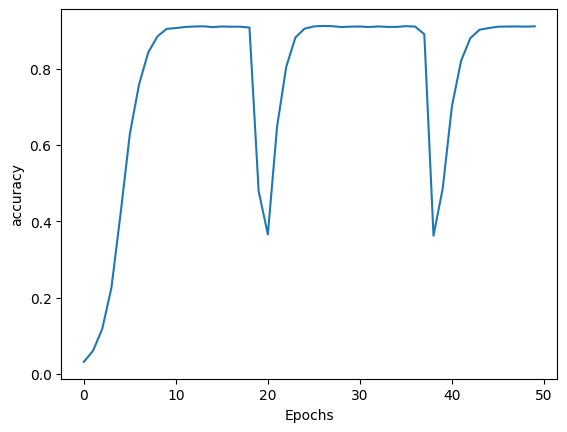

In [26]:
plot_graphs(history, 'accuracy')

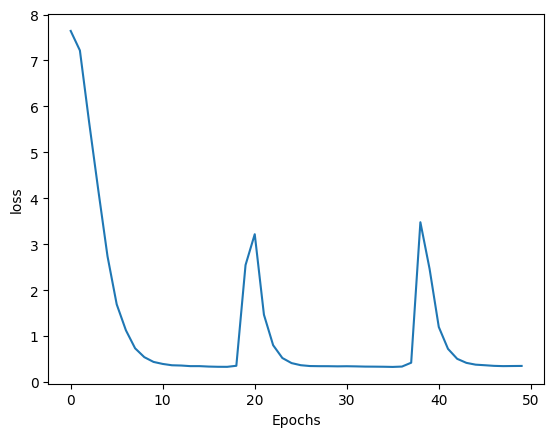

In [27]:


plot_graphs(history, 'loss')



In [35]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences

def generate_text(model, tokenizer, seed_text, max_sequence_len, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        
        # Predict the next word
        predicted = model.predict(token_list, verbose=0) 
        predicted = np.argmax(predicted, axis=1)
        
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        
        seed_text += " " + output_word
    return seed_text

# Example usage
seed_text = "I am"
next_words = 5
generated_text = generate_text(model, tokenizer, seed_text, max_sequence_len, next_words)
print(generated_text)


I am part of a great moment’
